# Laboratorio 5

**Ana Gabriela Silva Briceño** 

**27/10/2020**

In [1]:
#Importación
from qiskit import QuantumCircuit #Clase para crear circuitos
from qiskit import execute #Función para ejecutar simulaciones o trabajos en computadores cuánticos reales.
from qiskit import Aer #Módulo donde encontramos el acceso al simulador
from qiskit.visualization import plot_histogram #Visualizador del output como gráfico de barras
%matplotlib inline 
import numpy as np

In [2]:
def decimal_a_binario(n, k):
    '''
    Esta función recibe una longitud n y un entero k. Retorna una lista de longitud n tal que cada elemento
    es un dígito de la representación binaria de k.
    '''
    
    lista_binaria = []
    
    for i in reversed(range(n)):
        bit = k // 2**i
        k = k % 2**i
        lista_binaria.append(bit)
    
    return lista_binaria

In [3]:
def evaluar_oraculo_en_c(oraculo, c):
    
    
    tam = oraculo.num_qubits   # Tamaño o número de qubits que abarca el oráculo. No cambiar.
    
    ## Declaren el circuito cuántico con los parámetros adecuados:
    circuito = QuantumCircuit(tam,1)      
    
    ## Inicialización
    ## Usen este ciclo for y un condicional if dentro del for para inicializar con el valor de c 
    ## los alambres superiores según los bits contenidos en la lista c. 
    for i in range(len(c)):
        if c[i] == 1:
            circuito.x(i)

    # Insertar circuito. No cambiar el segundo parámetro.
    circuito.append(oraculo, list(range(tam)))
    
    ## Medición
    ## Añadan la medición con los parámetros adecuados:
    circuito.measure(tam-1,0)
    
    ## Realización de la simulación con 1 shot 
    simulador = Aer.get_backend('qasm_simulator')
    conteos = execute(circuito,backend=simulador,shots=1).result().get_counts()
    valor_orac_en_c = int(list(conteos.keys())[0]) # No cambiar. Extrae del diccionario el estado medido
    
    ## Retornar lo solicitado en las indicaciones
    return valor_orac_en_c

In [4]:
def tabular_oraculo(oraculo):
    '''
    Esta función recibe como argumento una compuerta cuántica (oráculo) e imprime la tabulación de los valores
    de f para toda cadena en su dominio.
    '''

    n = oraculo.num_qubits - 1   # Determina la longitud de las cadenas de 0s y 1s en el conjunto de salida de f.
    
    ## Crear un print que escriba el título de la tabulación según lo pedido en las indicaciones
    
    print("Tabla de valores de la función f:{0,1}^",n,"--->{0,1}")
    
    # Este ciclo for debe recorrer los enteros de 0 a 2^n - 1. Notemos que al pasar esos números 
    # a binario obtendremos todas las posibles cadenas de 0s y 1s de longitud n. 
    # (Desde 00...0 hasta 11...1)
     
    # Completar 
    for i in range(0,(2**n-1)+1):   
        
        ## Completar con los parámetros adecuados para obtener una lista que contenga la 
        ## representación binaria del contador del ciclo.
        s = decimal_a_binario(n,i)
        
        ## La variable 'valor' debe corresponder al valor de f(s) y debe hallarse usando la 
        ## función del ejercicio anterior
        valor = evaluar_oraculo_en_c(oraculo,s)  
  
        
        lista_a_cadena = ''.join([str(bit) for bit in s]) # Simplemente convierte la lista s a cadena para su
                                                          # uso en el print. No cambiar.
        
        ## Completar el print para que escriba la línea solicitada en las indicaciones.
        print("f("+lista_a_cadena+") =", valor)
    


## Ejercicio 1 

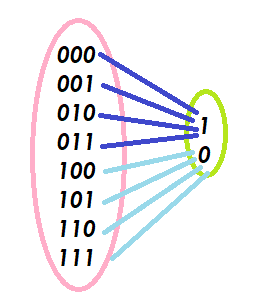

- **Condición 1:** Empieza con 00 ó empieza con 01.
- **Condición 2:** Empieza con  0.

**Circuito condición 1**

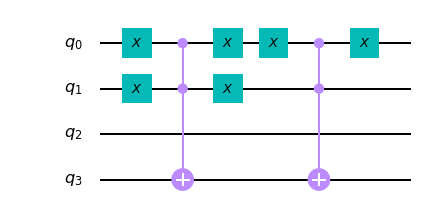

In [10]:
circuito = QuantumCircuit(4)
circuito.x(0)
circuito.x(1)
circuito.ccx(0,1,3)
circuito.x(0)
circuito.x(1)
#circuito.barrier()
circuito.x(0)
circuito.ccx(0,1,3)
circuito.x(0)


circuito.draw(output='mpl')

- En el primer Toffoli, en los qubits tienen compuertas x a cada lado ya que inicia en 00.
- En el segundo Toffoli, en el primer qubit tiene compuertas x en ambos lados y en el seguno no ya que inicia en 01.

In [11]:
orac = circuito.to_gate()
orac.name = 'Oráculo Uno_a'

In [12]:
tabular_oraculo(orac)

Tabla de valores de la función f:{0,1}^ 3 --->{0,1}
f(000) = 1
f(001) = 1
f(010) = 1
f(011) = 1
f(100) = 0
f(101) = 0
f(110) = 0
f(111) = 0


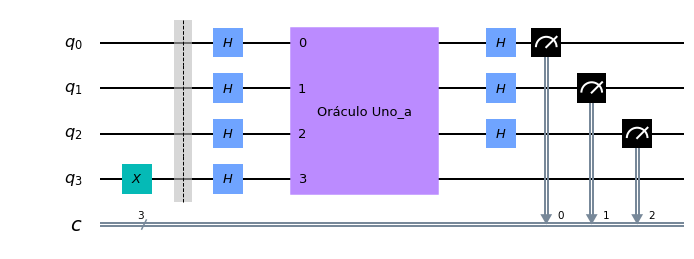

In [13]:
circuito_1 = QuantumCircuit(4,3)
circuito_1.x(3)
circuito_1.barrier()
circuito_1.h(0)
circuito_1.h(1)
circuito_1.h(2)
circuito_1.h(3)
circuito_1.append(orac,[0,1,2,3])
circuito_1.h(0)
circuito_1.h(1)
circuito_1.h(2)
circuito_1.measure(0,0)
circuito_1.measure(1,1)
circuito_1.measure(2,2)

circuito_1.draw(output='mpl')

In [14]:
#Ejecucion en un computador cuántico real
from qiskit import IBMQ
IBMQ.load_account()

proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_qasm_simulator')
ejecucion = execute(circuito_1, backend = comp_cuantico, shots=1000)

from qiskit.tools.monitor import job_monitor

job_monitor(ejecucion)

resultado = ejecucion.result() 
conteos1 = resultado.get_counts()

print(conteos1)

Job Status: job has successfully run
{'001': 1000}


In [ ]:
plot_histogram(conteos1)

**Circuito condición 2**

In [ ]:
circuito1 = QuantumCircuit(4)
circuito1.x(0)
circuito1.cx(0,3)
circuito1.x(0)


circuito1.draw(output='mpl')

- Las compuertas x en el primer qubit representa la condición que empieza en 1.

In [ ]:
orac1 = circuito1.to_gate()
orac1.name = 'Oráculo Uno_b'

In [ ]:
tabular_oraculo(orac1)

In [ ]:
circuito_2 = QuantumCircuit(4,3)
circuito_2.x(3)
circuito_2.barrier()
circuito_2.h(0)
circuito_2.h(1)
circuito_2.h(2)
circuito_2.h(3)
circuito_2.append(orac1,[0,1,2,3])
circuito_2.h(0)
circuito_2.h(1)
circuito_2.h(2)
circuito_2.measure(0,0)
circuito_2.measure(1,1)
circuito_2.measure(2,2)

circuito_2.draw(output='mpl')

In [ ]:

proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_qasm_simulator')
ejecucion = execute(circuito_2, backend = comp_cuantico, shots=1000)

from qiskit.tools.monitor import job_monitor

job_monitor(ejecucion)

resultado = ejecucion.result() 
conteos2 = resultado.get_counts()

print(conteos2)

In [ ]:
plot_histogram(conteos2)

- Computador cuántico : ibmq_qasm_simulator

En ninguno de los dos resultados se obtiene el estado |000⟩, ya que se realiza con el algoritmo de Deustch-Jozsa podemos afirmar que la función es balanceada.

## Ejercicio 3

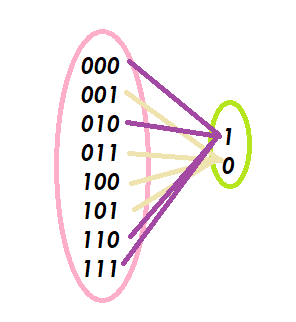

**Condición:** Empieza por 11 ó empieza y termina en 0.

In [ ]:
circuito3 = QuantumCircuit(4)
circuito3.ccx(0,1,3)
circuito3.barrier()
circuito3.x(0)
circuito3.x(2)
circuito3.ccx(0,2,3)
circuito3.x(0)
circuito3.x(2)

circuito3.draw(output='mpl')

- El primer Toffoli no tiene compuertas x a sus costados ya que empieza en 11.
- El siguiente toffoli tiene compuertas x a sus costados en el qubit 1 y 3 ya que empieza o termina en 0.

In [ ]:
orac3 = circuito3.to_gate()
orac3.name = 'Oráculo Tres'

In [ ]:
tabular_oraculo(orac3)

In [ ]:
circuito_3 = QuantumCircuit(4,3)
circuito_3.x(3)
circuito_3.barrier()
circuito_3.h(0)
circuito_3.h(1)
circuito_3.h(2)
circuito_3.h(3)
circuito_3.append(orac3,[0,1,2,3])
circuito_3.h(0)
circuito_3.h(1)
circuito_3.h(2)
circuito_3.measure(0,0)
circuito_3.measure(1,1)
circuito_3.measure(2,2)

circuito_3.draw(output='mpl')

In [ ]:
proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_qasm_simulator')
ejecucion = execute(circuito_3, backend = comp_cuantico, shots=1000)

from qiskit.tools.monitor import job_monitor

job_monitor(ejecucion)

resultado = ejecucion.result() 
conteos3 = resultado.get_counts()

print(conteos3)

In [ ]:
plot_histogram(conteos3)

- Computador cuántico : ibmq_qasm_simulator

En ninguno de los dos resultados se obtiene el estado |000⟩, ya que se realiza con el algoritmo de Deustch-Jozsa podemos afirmar que la función es balanceada.

## Ejercicio 5

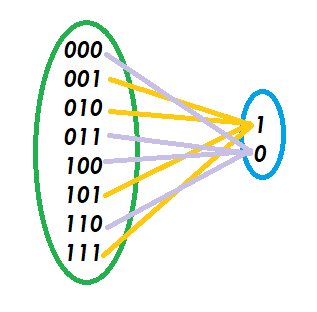

Se hace el cambio del 001 --> 0 y 000 --> 1, quedaría así.

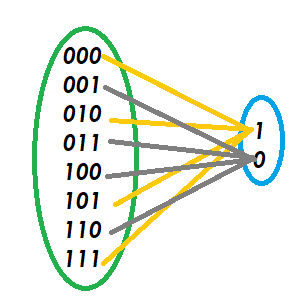

**Condición:** Empieza y termina con 0 ó empiezan y terminan con 1.

In [ ]:
circuito4 = QuantumCircuit(4)
circuito4.x(0)
circuito4.x(1)
circuito4.ccx(0,1,2)
circuito4.x(0)
circuito4.x(1)

circuito4.barrier()

circuito4.x(0)
circuito4.x(2)
circuito4.ccx(0,2,3)
circuito4.x(0)
circuito4.x(2)
circuito4.ccx(0,2,3)

circuito4.barrier()

circuito4.x(0)
circuito4.x(1)
circuito4.ccx(0,1,2)
circuito4.x(0)
circuito4.x(1)

circuito4.draw(output='mpl')


- En la primera y última parte tenemos Toffolis con compuertas x en el 1 y 2 qubit(Los número a intercambiar ambos empiezan con 00), y el target está en el tercer qubit ya que es el número que se intercambió. 

- Dentro de las barreras, el primer Toffoli representa con las compuertas x en el primer y tercer qubit que empieza y termina en 0, el segundo toffoli, sin compuertas x representa que inicia y termina en 1.  

In [ ]:
orac4= circuito4.to_gate()
orac4.name = 'Oráculo Cuarto'

In [ ]:
tabular_oraculo(orac4)

In [ ]:
circuito_4 = QuantumCircuit(4,3)
circuito_4.x(3)
circuito_4.barrier()
circuito_4.h(0)
circuito_4.h(1)
circuito_4.h(2)
circuito_4.h(3)
circuito_4.append(orac4,[0,1,2,3])
circuito_4.h(0)
circuito_4.h(1)
circuito_4.h(2)
circuito_4.measure(0,0)
circuito_4.measure(1,1)
circuito_4.measure(2,2)

circuito_4.draw(output='mpl')

In [ ]:
proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_qasm_simulator')
ejecucion = execute(circuito_4, backend = comp_cuantico, shots=1000)

from qiskit.tools.monitor import job_monitor

job_monitor(ejecucion)

resultado = ejecucion.result() 
conteos4 = resultado.get_counts()

print(conteos4)

In [ ]:
plot_histogram(conteos4)

- Computador cuántico : ibmq_qasm_simulator

En ninguno de los dos resultados se obtiene el estado |000⟩, ya que se realiza con el algoritmo de Deustch-Jozsa podemos afirmar que la función es balanceada.


### **Análisis final**

En ninguna de las tres funciones se dió el resultado de |000⟩ ya que por conocimientos previos de clase, sabemos que el resultado 000 es el único que nos indica que es constante la función, esta es la razón por la que no obtenemos este resultado ya que todas son funciones balanceadas. 



# QUIZ 1 TERCIO 3


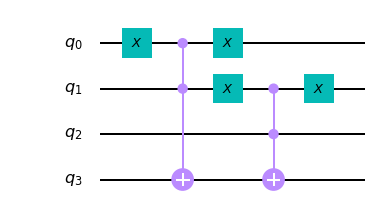

In [16]:
circuitoquiz = QuantumCircuit(4)
circuitoquiz.x(0)
circuitoquiz.ccx(0,1,3)
circuitoquiz.x(0)
circuitoquiz.x(1)
circuitoquiz.ccx(1,2,3)
circuitoquiz.x(1)

circuitoquiz.draw(output='mpl')


In [20]:
oracQuiz = circuitoquiz.to_gate()
oracQuiz.name = 'Oráculo Quiz'

In [21]:
tabular_oraculo(oracQuiz)

Tabla de valores de la función f:{0,1}^ 3 --->{0,1}
f(000) = 0
f(001) = 1
f(010) = 1
f(011) = 1
f(100) = 0
f(101) = 1
f(110) = 0
f(111) = 0


**EQUIVALENCIA**

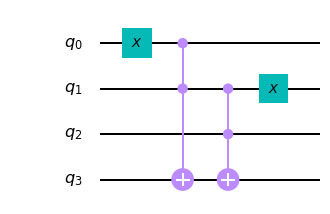

In [19]:
circuitoquiz2 = QuantumCircuit(4)
circuitoquiz2.x(0)
circuitoquiz2.ccx(0,1,3)
circuitoquiz2.ccx(1,2,3)
circuitoquiz2.x(1)

circuitoquiz2.draw(output='mpl')

In [22]:
oracQuiz2 = circuitoquiz2.to_gate()
oracQuiz2.name = 'Oráculo Quiz'

In [23]:
tabular_oraculo(oracQuiz2)

Tabla de valores de la función f:{0,1}^ 3 --->{0,1}
f(000) = 0
f(001) = 0
f(010) = 1
f(011) = 0
f(100) = 0
f(101) = 0
f(110) = 0
f(111) = 1
